In [66]:
import pickle
import numpy as np

In [67]:
with open("../results/xu_ins/xu_ins_acc_gpt.pkl", "rb") as f:
    gpt_accs = pickle.load(f)

In [68]:
with open("../results/xu_ins/xu_ins_acc_iter.pkl", "rb") as f:
    iter_accs = pickle.load(f)

In [69]:
len(gpt_accs), len(iter_accs)

(906498, 906498)

In [70]:
np.mean(gpt_accs), np.mean(iter_accs)

(0.405719593424365, 0.5195709201785332)

In [71]:
np.mean(np.equal(gpt_accs, iter_accs))

0.5032531787163347

In [72]:
it_true_count = 0
true_aggreement = 0
for gpt, it in zip(gpt_accs, iter_accs):
    if it == 1:
        it_true_count += 1
        if gpt == 1:
            true_aggreement += 1
print(it_true_count, true_aggreement)

470990 194237


In [73]:
gpt_true_count = 0
true_aggreement = 0
for gpt, it in zip(gpt_accs, iter_accs):
    if gpt == 1:
        gpt_true_count += 1
        if it == 1:
            true_aggreement += 1
print(gpt_true_count, true_aggreement)

367784 194237


In [78]:
from sklearn.metrics import cohen_kappa_score

In [79]:
cohen_kappa_score(gpt_accs, iter_accs)

0.013785231163768175

# Stats to collect
* accuracy at each position being replaced
* accuracy at different sentence lengths
* accuracy at different paragraph lengths (num sentences)

In [86]:
import csv
import sys
csv.field_size_limit(sys.maxsize)
data = []
with open("../data/xu_cluster/test_perm.tsv", "r") as f:
    reader = csv.reader(f, delimiter="\t")
    for row in reader:
        data.append(row[1])
data = [d.split("<PUNC>") for d in data]
len(data)

1054

In [89]:
pos_replaced = []
pos_inserted = []
sent_len = []
paragraph_len = []
for d in data:
    for i in range(len(d)):
        for j in range(len(d)):
            if i == j:
                continue
            pos_replaced.append(i)
            pos_inserted.append(j)
            sent_len.append(len(d[i]))
            paragraph_len.append(len(d))

906498


In [92]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

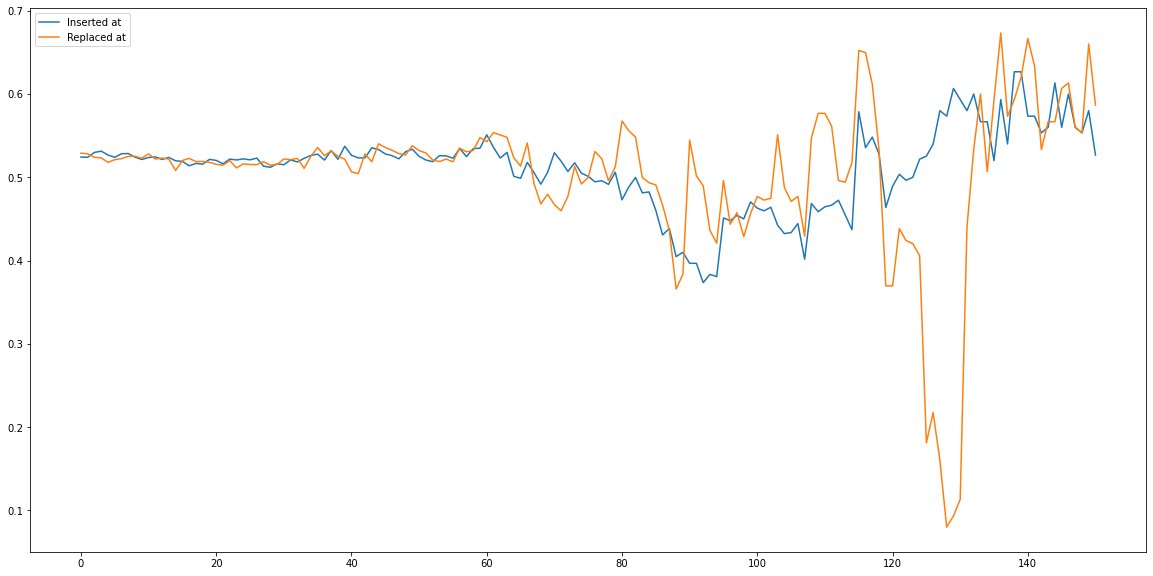

In [99]:
from collections import defaultdict
per_pos_rep_accs = defaultdict(list)
per_pos_ins_accs = defaultdict(list)
for i in range(len(iter_accs)):
    per_pos_rep_accs[pos_replaced[i]].append(iter_accs[i])
    per_pos_ins_accs[pos_inserted[i]].append(iter_accs[i])
ins_accs_x = []
ins_accs_y = []
for k, v in per_pos_ins_accs.items():
    ins_accs_x.append(k)
    ins_accs_y.append(np.mean(v))
rep_accs_x = []
rep_accs_y = []
for k, v in per_pos_rep_accs.items():
    rep_accs_x.append(k)
    rep_accs_y.append(np.mean(v))
plt.figure(figsize=(20,10))
order = np.argsort(ins_accs_x)
plt.plot(np.array(ins_accs_x)[order], np.array(ins_accs_y)[order], label="Inserted at")
plt.plot(rep_accs_x, rep_accs_y, label="Replaced at")
plt.legend()

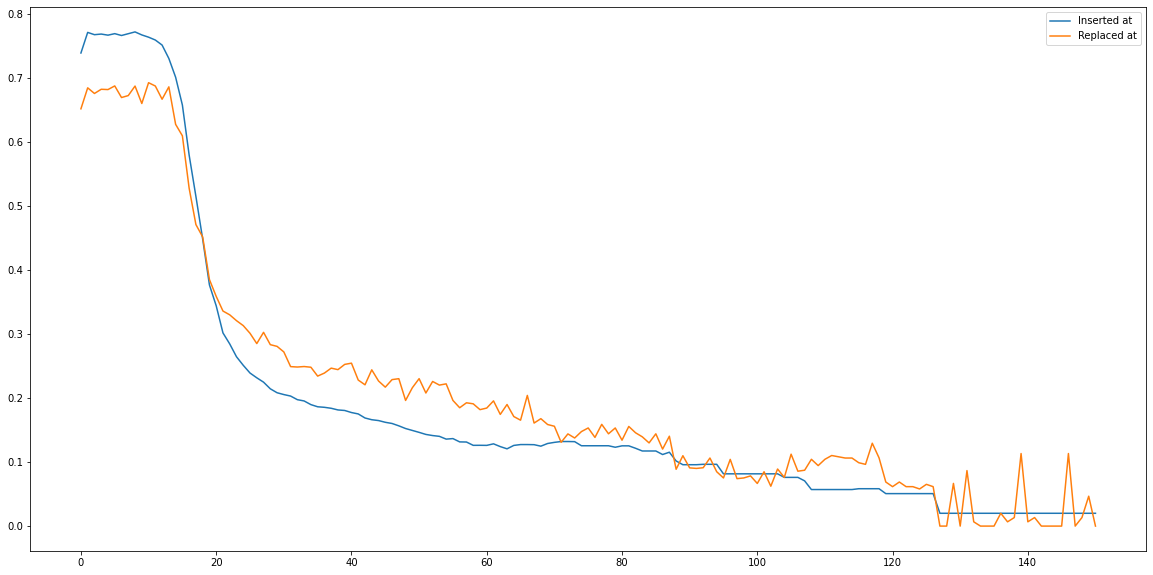

In [100]:
from collections import defaultdict
per_pos_rep_accs = defaultdict(list)
per_pos_ins_accs = defaultdict(list)
for i in range(len(iter_accs)):
    per_pos_rep_accs[pos_replaced[i]].append(gpt_accs[i])
    per_pos_ins_accs[pos_inserted[i]].append(gpt_accs[i])
ins_accs_x = []
ins_accs_y = []
for k, v in per_pos_ins_accs.items():
    ins_accs_x.append(k)
    ins_accs_y.append(np.mean(v))
rep_accs_x = []
rep_accs_y = []
for k, v in per_pos_rep_accs.items():
    rep_accs_x.append(k)
    rep_accs_y.append(np.mean(v))
plt.figure(figsize=(20,10))
order = np.argsort(ins_accs_x)
plt.plot(np.array(ins_accs_x)[order], np.array(ins_accs_y)[order], label="Inserted at")
plt.plot(rep_accs_x, rep_accs_y, label="Replaced at")
plt.legend()

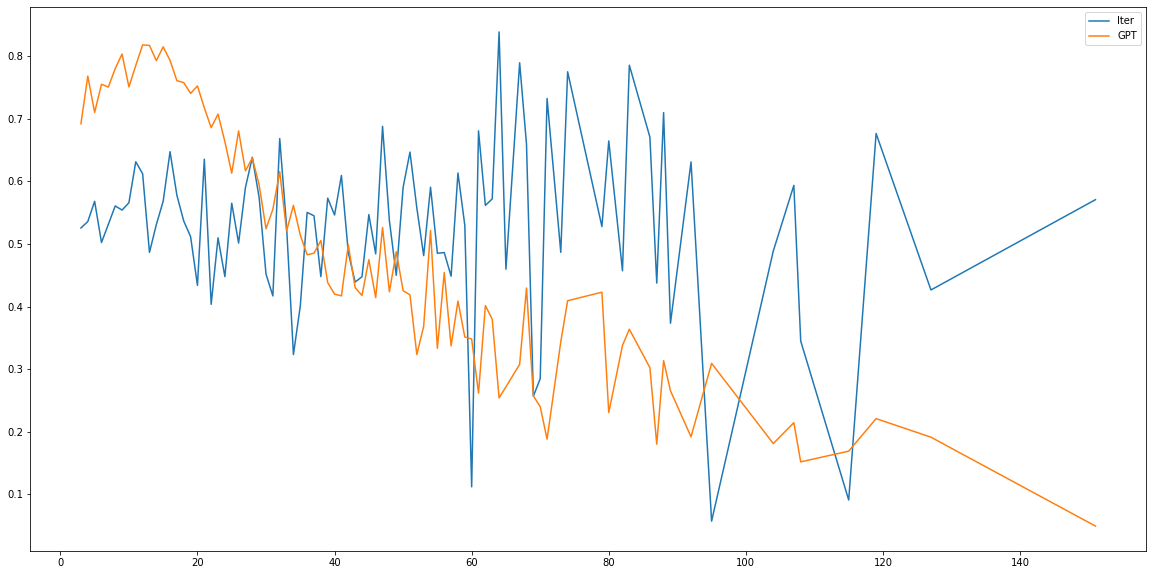

In [103]:
para_len_accs_iter = defaultdict(list)
para_len_accs_gpt = defaultdict(list)

for i in range(len(iter_accs)):
    para_len_accs_iter[paragraph_len[i]].append(iter_accs[i])
for i in range(len(iter_accs)):
    para_len_accs_gpt[paragraph_len[i]].append(gpt_accs[i])
iter_accs_x = []
iter_accs_y = []
for k, v in para_len_accs_iter.items():
    iter_accs_x.append(k)
    iter_accs_y.append(np.mean(v))
gpt_accs_x = []
gpt_accs_y = []
for k, v in para_len_accs_gpt.items():
    gpt_accs_x.append(k)
    gpt_accs_y.append(np.mean(v))
plt.figure(figsize=(20,10))
order = np.argsort(iter_accs_x)
plt.plot(np.array(iter_accs_x)[order], np.array(iter_accs_y)[order], label="Iter")
order = np.argsort(gpt_accs_x)
plt.plot(np.array(gpt_accs_x)[order], np.array(gpt_accs_y)[order], label="GPT")
plt.legend()

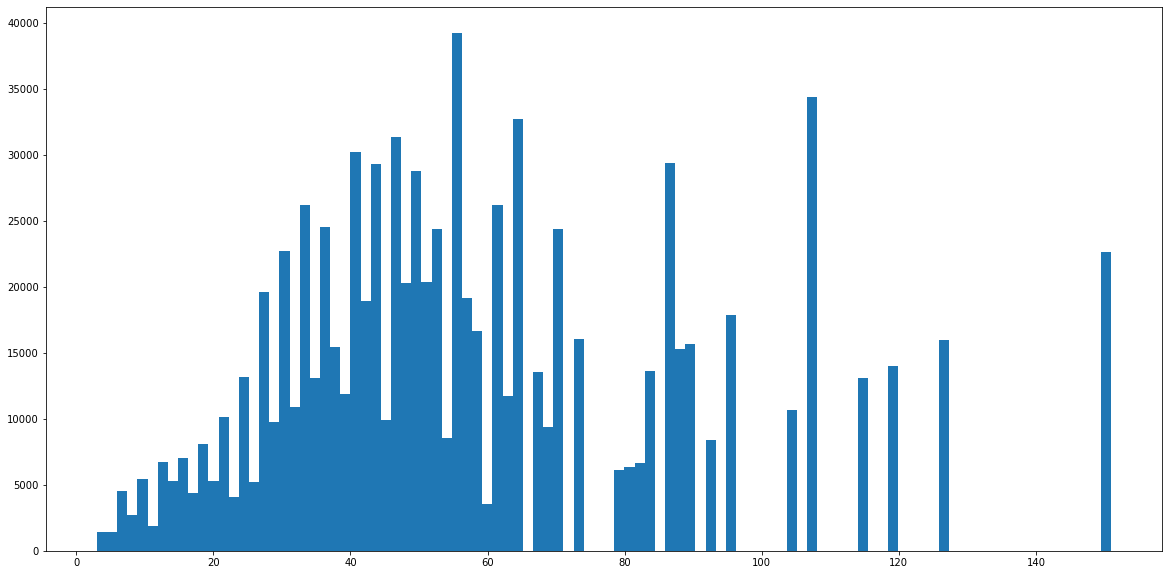

In [106]:
plt.figure(figsize=(20,10))
plt.hist(paragraph_len, bins=100)
pass

In [108]:
from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

In [112]:
token_lens = []
for d in data:
     token_lens.append(len(tokenizer.encode(" ".join(d))))

Token indices sequence length is longer than the specified maximum sequence length for this model (1886 > 1024). Running this sequence through the model will result in indexing errors


In [114]:
np.mean(np.array(token_lens) > 512)

0.43263757115749524

In [115]:
token_len = []
for dd, d in enumerate(data):
    for i in range(len(d)):
        for j in range(len(d)):
            if i == j:
                continue
            token_len.append(token_lens[dd])

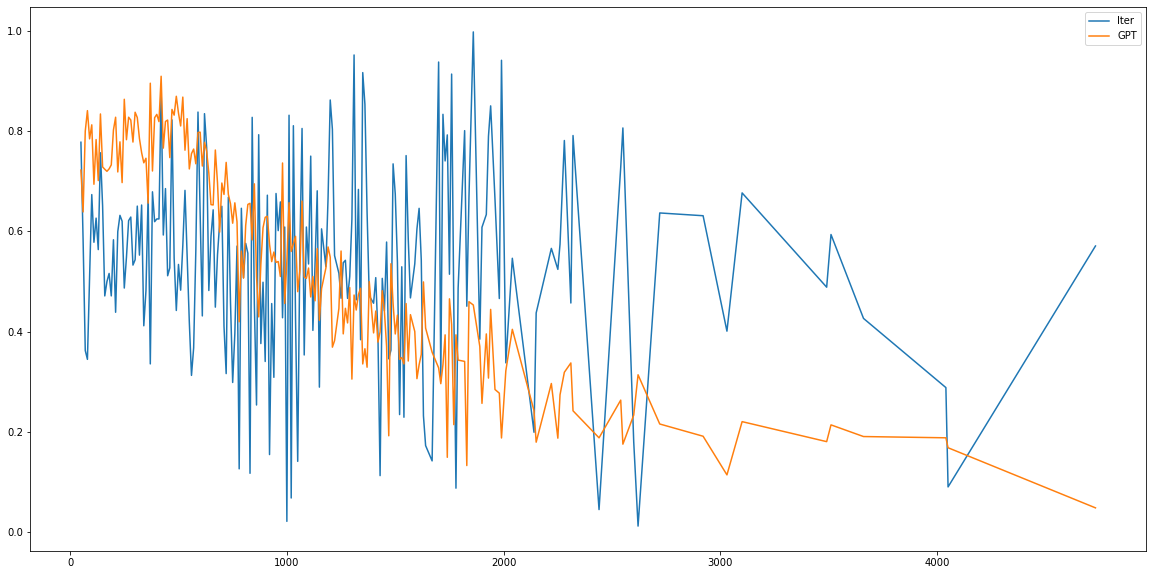

In [117]:
para_len_accs_iter = defaultdict(list)
para_len_accs_gpt = defaultdict(list)

for i in range(len(iter_accs)):
    para_len_accs_iter[round(token_len[i], -1)].append(iter_accs[i])
for i in range(len(iter_accs)):
    para_len_accs_gpt[round(token_len[i], -1)].append(gpt_accs[i])
iter_accs_x = []
iter_accs_y = []
for k, v in para_len_accs_iter.items():
    iter_accs_x.append(k)
    iter_accs_y.append(np.mean(v))
gpt_accs_x = []
gpt_accs_y = []
for k, v in para_len_accs_gpt.items():
    gpt_accs_x.append(k)
    gpt_accs_y.append(np.mean(v))
plt.figure(figsize=(20,10))
order = np.argsort(iter_accs_x)
plt.plot(np.array(iter_accs_x)[order], np.array(iter_accs_y)[order], label="Iter")
order = np.argsort(gpt_accs_x)
plt.plot(np.array(gpt_accs_x)[order], np.array(gpt_accs_y)[order], label="GPT")
plt.legend()

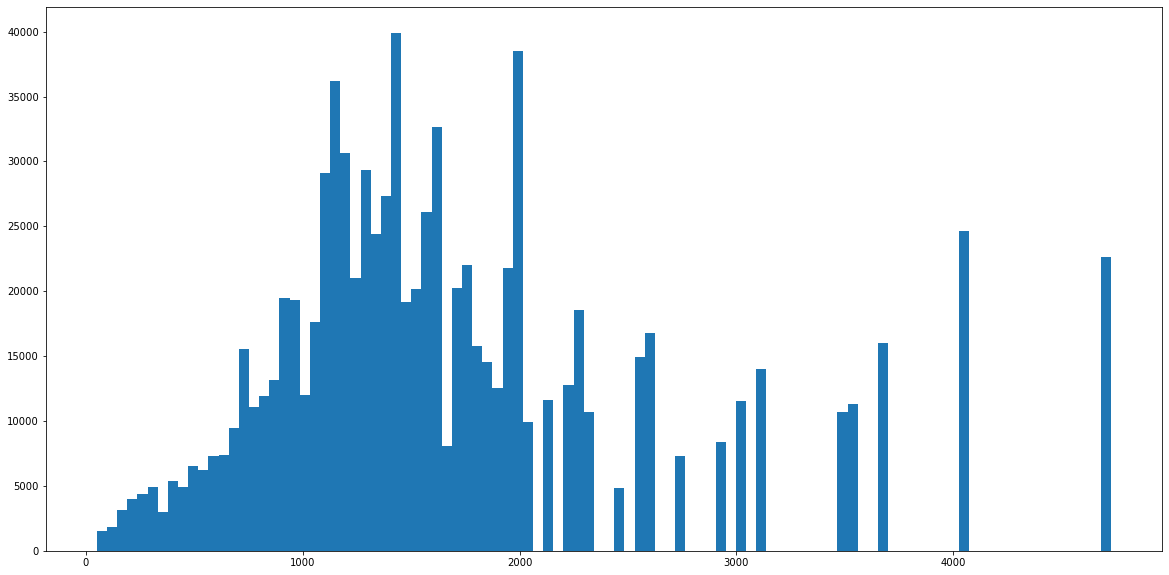

In [118]:
plt.figure(figsize=(20,10))
plt.hist(token_len, bins=100)
pass

# Inspect dataset

In [34]:
total = 0
for d in data:
    for i in range(len(d)):
        for j in range(len(d)):
            if i == j:
                continue
            total += 1
print(total)

906498


In [32]:
np.mean([len(d) for d in data])

21.27324478178368

In [35]:
import pickle

In [48]:
import sys
sys.path.append("../src/")
%load_ext autoreload
%autoreload 2

In [49]:
import glob
import data
import torch
from torch.utils.data import DataLoader
import training

In [50]:
ds = data.InsertionDataset(glob.glob("../data/xu/*.pkl"), 128, torch.device("cpu"))

In [51]:
len(ds.all_spans)

1054

In [56]:
dl = DataLoader(ds, batch_size=1, num_workers=0)

In [57]:
data_counter = 0
for _ in dl:
    data_counter += 1

KeyboardInterrupt: 

In [58]:
data_counter

235

In [60]:
for batch in dl:
    print(batch)
    break

[tensor([[[-6.2769e-01,  4.6157e-02,  3.5939e-01, -6.6713e-02,  5.5757e-01,
          -6.1143e-02,  1.0497e-01,  6.2606e-01,  7.4772e-02, -1.5620e-02,
          -1.2557e-01,  3.7195e-01, -2.1031e-03,  2.4489e-01, -2.1411e-01,
           1.0879e-01, -1.7785e-01, -5.7081e-02,  4.3670e-01, -2.4949e-03,
          -1.8088e-01, -1.0443e-01,  1.3801e-01,  9.1930e-02,  8.5664e-02,
           3.6354e-01, -4.5255e-01,  1.5705e-01, -3.6959e-01,  2.3285e-01,
           7.8522e-02, -1.7251e-01,  7.9905e-01,  2.4101e-01, -4.0137e-04,
          -4.3978e-01, -1.8461e-01, -1.5516e-02, -6.7140e-01,  5.7448e-01,
           5.1513e-02,  8.9472e-02,  2.7271e-01, -2.3453e-01,  1.3669e-01,
           2.8465e-01,  4.8085e-01, -3.3663e-02, -6.3398e-03, -2.8632e-02,
          -3.0595e-02,  6.8251e-02,  1.8317e-02, -3.7765e-02, -3.2800e-01,
          -2.2494e-01,  4.5574e-01,  1.6235e-02,  8.1332e-02,  2.1271e-01,
           4.0629e-01, -6.4990e-01, -1.6434e-01, -3.2075e-01,  8.5125e-02,
           3.7402e-02,  

In [65]:
batch[0].shape

torch.Size([1, 1, 768])